### 1. Install the scikit-learn library.

### 2. Import the libraries you need into a new notebook, including any necessary modules from scikit-learn.

In [138]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [139]:
# This option ensures that the graphs created are displayed within the notebook without the need to "call" them specifically.
%matplotlib inline

In [140]:
path = r"C:\Users\andyc\Job Salary Analysis"

In [141]:
# Import the salary data
salary = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'salary.csv'), index_col = False)

In [142]:
salary.head()

,Unnamed: 0,ID,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,United Kingdom,White
1,1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,United States of America,Hispanic
2,2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,United States of America,Hispanic
4,4,4,52.0,Male,Master's,Director,20.0,200000.0,United States of America,Asian


In [143]:
salary.shape

(6702, 10)

### 3. Clean your data so that it’s ready for analysis.

In [145]:
# Check for missing values
salary.isnull().sum()

Unnamed: 0             0
ID                     0
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Country                0
Race                   0
dtype: int64

There are no missing values.

In [147]:
#Checking for duplicates
dups = salary.duplicated()

In [148]:
dups.shape # No dups

(6702,)

There are no duplicates.

In [150]:
#dropping the unnamed :0 column as it provides unnecessary information to the analysis
salary = salary.drop(columns = ['Unnamed: 0'])

In [151]:
salary.describe()

,ID,Age,Years of Experience,Salary
count,6702.000000,6702.000000,6702.000000,6702.00000
mean,3352.435691,33.620859,8.094524,115330.99627
std,1934.952777,7.614633,6.058566,52786.23587
min,0.000000,21.000000,0.000000,350.00000
25%,1677.250000,28.000000,3.000000,70000.00000
50%,3352.500000,32.000000,7.000000,115000.00000
75%,5027.750000,38.000000,12.000000,160000.00000
max,6703.000000,62.000000,34.000000,250000.00000


### 4. Explore your data visually (e.g., by way of a scatterplot), looking for variables whose relationship you’d like to test.

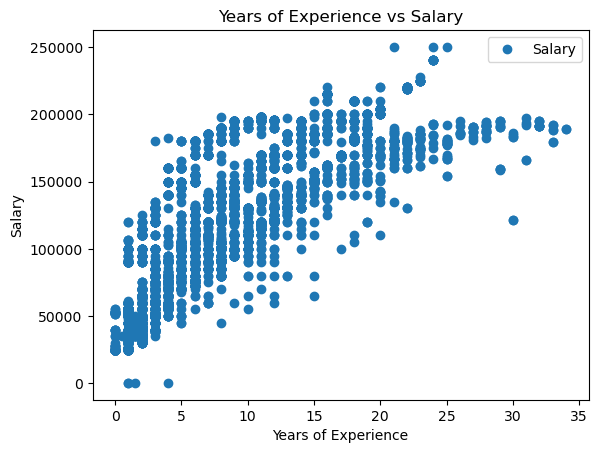

In [153]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

salary.plot(x = 'Years of Experience', y='Salary',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Years of Experience vs Salary')  
plt.xlabel('Years of Experience')  
plt.ylabel('Salary')  
plt.show()

### 5. State your hypothesis in a markdown cell within your Jupyter notebook.

If an individual has more years of experience, then they are likely to earn a higher salary.

### 6. Reshape the variables into NumPy arrays, with X being the independent variable and y being the dependent variable.

In [157]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = salary['Years of Experience'].values.reshape(-1,1)
y = salary['Salary'].values.reshape(-1,1)

In [158]:
X

array([[ 5.],
       [ 3.],
       [15.],
       ...,
       [ 4.],
       [14.],
       [ 1.]])

In [159]:
y

array([[ 90000.],
       [ 65000.],
       [150000.],
       ...,
       [ 55000.],
       [140000.],
       [ 35000.]])

### 7. Split the data into two sets: a training set and a test set.

In [161]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 8. Run a linear regression on the data.

In [163]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [164]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [165]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

### 9. Create a plot that shows the regression line on the test set.

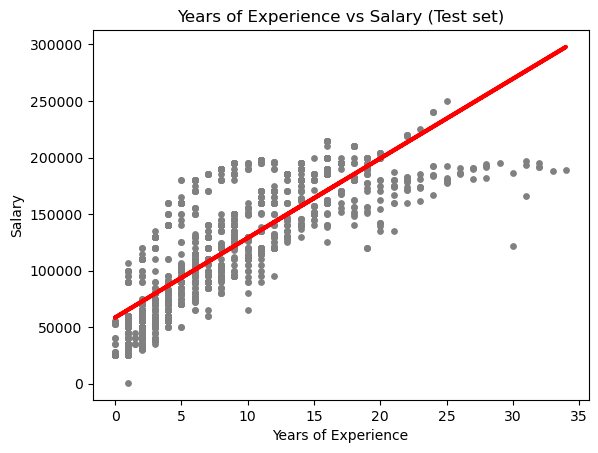

In [167]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Years of Experience vs Salary (Test set)')
plot_test.xlabel('Years of Experience')
plot_test.ylabel('Salary')
plot_test.show()

### 10. Write your own interpretation of how well the line appears to fit the data in a markdown cell.

In my own interpretation, the line seems to go the direction of the plotted graph however, the points do not directly align with the red line. Instead, the points are based around the red line. This means that this model may be accurate but not spot on.

### 11. Check the model performance statistics—MSE and R2 score.

In [171]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [172]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[7042.7572431]]
Mean squared error:  919917269.0388057
R2 score:  0.6683663606642766


In [173]:
y_predicted

array([[178127.02864443],
       [107699.45621344],
       [178127.02864443],
       ...,
       [135870.48518584],
       [149955.99967204],
       [142913.24242894]])

### 12. Compare the predicted y values with the actual y values in a dataframe.

In [175]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,195000.0,178127.028644
1,85000.0,107699.456213
2,195000.0,178127.028644
3,155000.0,100656.698970
4,120000.0,114742.213457
5,186321.0,269682.872805
6,90000.0,107699.456213
7,125000.0,121784.970700
8,33000.0,72485.669998
9,100000.0,128827.727943


### 13. Include your thoughts on how well the model performed on the test set in a markdown cell.

After observing the predicted and actual values of y (salary), I think it predicted some of the values well and some not so well. It was not super accurate and some of the predictions were off. There could potentially be bias due to defaulting to high salary when the years of experience is high. I think it depends on the type of job and other factors other than just years of experience. On another note, the average salary from different countries may be different due to the cost of living and other living expenses.

### Additional Analysis:

### Job Title: Data Analyst, Country: United States of America

In [180]:
#creating a filtered subset where we only use country = united states of america and job title = data analyst

filtered_salary = salary[(salary['Country'] == 'United States of America') & (salary['Job Title'] == 'Data Analyst')]

In [181]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X_filtered = filtered_salary['Years of Experience'].values.reshape(-1, 1)
y_filtered = filtered_salary['Salary'].values.reshape(-1,1)

In [182]:
# Split data into a training set and a test set.

X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_filtered, y_filtered, test_size=0.3, random_state=0)

In [183]:
# Create a regression object.

regression_f = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [184]:
# Fit the regression object onto the training set.

regression_f.fit(X_train_f, y_train_f)

LinearRegression()

In [185]:
# Predict the values of y using X.

y_predicted_f = regression_f.predict(X_test_f)

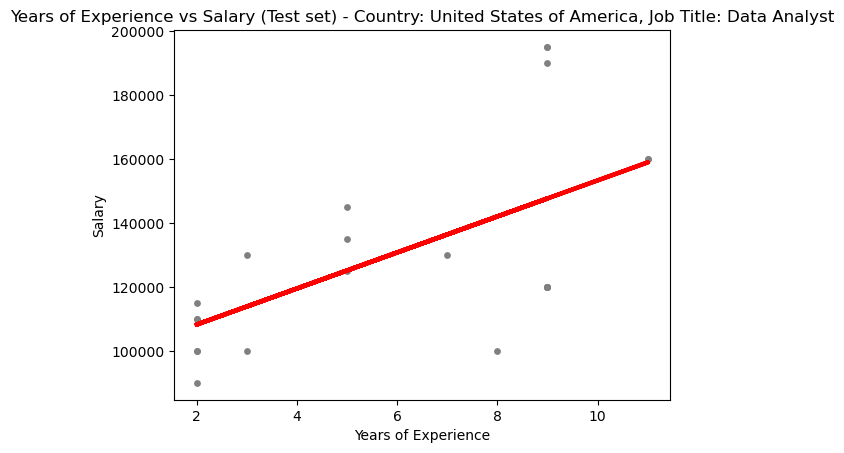

In [186]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test_f, y_test_f, color='gray', s = 15)
plot_test.plot(X_test_f, y_predicted_f, color='red', linewidth =3)
plot_test.title('Years of Experience vs Salary (Test set) - Country: United States of America, Job Title: Data Analyst')
plot_test.xlabel('Years of Experience')
plot_test.ylabel('Salary')
plot_test.show()

In [187]:
# Create objects that contain the model summary statistics.

rmse_f = mean_squared_error(y_test_f, y_predicted_f) # This is the mean squared error
r2_f = r2_score(y_test_f, y_predicted_f) # This is the R2 score. 

In [188]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression_f.coef_)
print('Mean squared error: ', rmse_f)
print('R2 score: ', r2_f)

Slope: [[5628.56101762]]
Mean squared error:  581499280.8252331
R2 score:  0.3585379635980642


In [189]:
y_predicted_f

array([[108249.33748509],
       [147649.26460845],
       [108249.33748509],
       [147649.26460845],
       [113877.89850272],
       [147649.26460845],
       [147649.26460845],
       [113877.89850272],
       [125135.02053796],
       [108249.33748509],
       [108249.33748509],
       [147649.26460845],
       [108249.33748509],
       [158906.3866437 ],
       [147649.26460845],
       [147649.26460845],
       [108249.33748509],
       [125135.02053796],
       [142020.70359083],
       [147649.26460845],
       [125135.02053796],
       [136392.14257321],
       [158906.3866437 ]])

In [190]:
# Create a dataframe comparing the actual and predicted values of y.

data_f = pd.DataFrame({'Actual': y_test_f.flatten(), 'Predicted': y_predicted_f.flatten()})
data_f.head(30)

,Actual,Predicted
0,90000.0,108249.337485
1,120000.0,147649.264608
2,110000.0,108249.337485
3,190000.0,147649.264608
4,130000.0,113877.898503
5,195000.0,147649.264608
6,120000.0,147649.264608
7,100000.0,113877.898503
8,135000.0,125135.020538
9,110000.0,108249.337485


### Interpretation:

With a R2 score:  0.3585379635980642, we can conclude that this prediction is not very accurate as the number is further away from 1. Most of the points are scattered around the red line and does not have a clear trend. This confirms that our model is not purely linear. This means our model may not be a good fit. Compared to our original model where we included all job titles and countries, this model that tests for a specific job title(Data Analyst) in a specific country(USA) is not as accurate. The low r2 value suggests that there are other factors other than years of experience and the country that affect a data anaylst's salary.

### Job Title: Data Analyst, Country: China

In [194]:
#creating a filtered subset where we only use country = China and job title = data analyst

filtered_china_salary = salary[(salary['Country'] == 'China') & (salary['Job Title'] == 'Data Analyst')]

In [195]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X_filtered_china = filtered_china_salary['Years of Experience'].values.reshape(-1, 1)
y_filtered_china = filtered_china_salary['Salary'].values.reshape(-1,1)

In [196]:
# Split data into a training set and a test set.

X_train_f_china, X_test_f_china, y_train_f_china, y_test_f_china = train_test_split(X_filtered_china, y_filtered_china, test_size=0.3, random_state=0)

In [197]:
# Create a regression object.

regression_f_china = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [198]:
# Fit the regression object onto the training set.

regression_f_china.fit(X_train_f_china, y_train_f_china)

LinearRegression()

In [199]:
# Predict the values of y using X.

y_predicted_f_china = regression_f_china.predict(X_test_f_china)

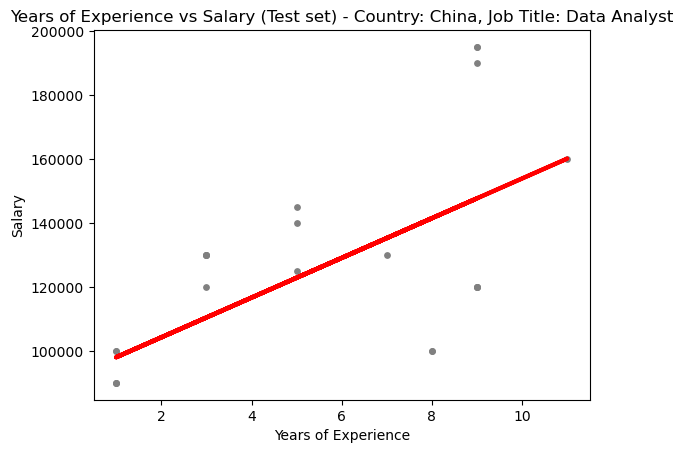

In [200]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test_f_china, y_test_f_china, color='gray', s = 15)
plot_test.plot(X_test_f_china, y_predicted_f_china, color='red', linewidth =3)
plot_test.title('Years of Experience vs Salary (Test set) - Country: China, Job Title: Data Analyst')
plot_test.xlabel('Years of Experience')
plot_test.ylabel('Salary')
plot_test.show()

In [201]:
# Create objects that contain the model summary statistics.

rmse_f_china = mean_squared_error(y_test_f_china, y_predicted_f_china) # This is the mean squared error
r2_f_china = r2_score(y_test_f_china, y_predicted_f_china) # This is the R2 score. 

In [202]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression_f_china.coef_)
print('Mean squared error: ', rmse_f_china)
print('R2 score: ', r2_f_china)

Slope: [[6204.40243361]]
Mean squared error:  642177083.3044624
R2 score:  0.30248161421201136


In [203]:
y_predicted_f_china

array([[110449.27801133],
       [ 98040.47314411],
       [110449.27801133],
       [160084.49748022],
       [122858.08287855],
       [147675.692613  ],
       [147675.692613  ],
       [147675.692613  ],
       [147675.692613  ],
       [122858.08287855],
       [110449.27801133],
       [141471.29017939],
       [122858.08287855],
       [141471.29017939],
       [135266.88774578],
       [110449.27801133],
       [ 98040.47314411],
       [147675.692613  ],
       [ 98040.47314411],
       [110449.27801133],
       [ 98040.47314411],
       [ 98040.47314411],
       [147675.692613  ],
       [147675.692613  ]])

In [204]:
# Create a dataframe comparing the actual and predicted values of y.

data_f_china = pd.DataFrame({'Actual': y_test_f_china.flatten(), 'Predicted': y_predicted_f_china.flatten()})
data_f_china.head(30)

,Actual,Predicted
0,120000.0,110449.278011
1,90000.0,98040.473144
2,130000.0,110449.278011
3,160000.0,160084.497480
4,140000.0,122858.082879
5,120000.0,147675.692613
6,120000.0,147675.692613
7,120000.0,147675.692613
8,190000.0,147675.692613
9,125000.0,122858.082879


### Interpretation:

With a R2 score:  0.30248161421201136, it is slightly lower than the data from the United States of America plot. There is less accuracy than the previous one and is further away from 1. This confirms that our model is not purely linear and may not be a good fit. The low r2 value suggests that there are other factors other than years of experience and the country that affect a data anaylst's salary.